### Kerry Back, Rice University, Original Source

<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/11-backtest_sector.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Rice MBA candidate Ray Lee add extension based on professor Kerry's handout


## Read data

- Penny stocks have been eliminated
- Data includes both large caps and small caps.  You can filter to small caps if you want.
- Filter to your sector.

In [ ]:
from google.colab import drive
import sys
from joblib import load
import pandas as pd

drive.mount('/content/drive', force_remount=True)

folder_path = '/content/drive/MyDrive/MGMT767/final_combine_data_03282024.csv'
sys.path.append(folder_path)


Mounted at /content/drive


In [ ]:
df = pd.read_csv(folder_path)
df.tail()

,Unnamed: 0,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,...,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss,DaystoCover
1014352,1119155,3146806,ZYXI,2024-02-23,430.9,7.4,0.015736,-0.216858,251097.0,0.068036,...,0.253785,-0.005658,0.072638,Healthcare,0.121587,24567.50,0.0,52494.75,0.467999,25.86
1014353,1119157,3146808,ZYXI,2024-03-08,417.0,7.1,0.045528,-0.079590,491351.2,0.068831,...,0.253785,-0.005658,0.072638,Healthcare,0.120634,24164.25,15.0,48474.50,0.498494,20.47
1014354,1119158,3146809,ZYXI,2024-03-15,436.0,7.4,-0.024106,0.303253,200733.4,0.068432,...,0.168182,-0.138665,0.038452,Healthcare,0.122095,26573.00,13.0,43840.00,0.606136,52.52
1014355,1119159,3146809,ZYXI,2024-03-15,436.0,7.4,-0.024106,0.303253,200733.4,0.068432,...,0.168182,-0.138665,0.038452,Healthcare,0.122095,26573.00,13.0,43840.00,0.606136,20.47
1014356,1119160,3146810,ZYXI,2024-03-22,403.7,8.8,0.017530,0.210476,188046.0,0.066006,...,0.168182,-0.138665,0.038452,Healthcare,0.115083,17761.40,12.2,30545.40,0.581475,52.52


In [ ]:
#If Fama-French data is not updated yet, we will filter out the date
#df = df[df['date']< "2024-04-01"]

In [ ]:
df.head()

,Unnamed: 0,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,...,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss,DaystoCover
0,0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,...,0.051039,-0.171638,0.022993,Healthcare,0.080747,111753.00,204.666667,554732.666667,0.201454,1.70
1,1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,...,0.051039,-0.171638,0.022993,Healthcare,0.081378,146847.40,232.800000,477696.400000,0.307407,1.70
2,3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,...,0.051039,-0.171638,0.022993,Healthcare,0.079414,156824.00,33.600000,666870.800000,0.235164,1.95
3,4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,...,0.064328,-0.152186,0.002575,Healthcare,0.074955,125026.00,2.400000,425225.800000,0.294023,1.95
4,5,453,A,2018-09-07,21142.4,4.6,-0.002068,0.030179,1820829.4,0.033025,...,0.064328,-0.152186,0.002575,Healthcare,0.070754,201106.25,611.750000,418972.000000,0.479999,2.56


In [ ]:
#Uncomment this section if we want to filter the marketcap
# uncomment and execute the following to filter to small caps
"""
df["rnk"] = df.groupby("date", group_keys=False).marketcap.rank(
    ascending=False,
    method="first"
)
df = df[(df.rnk>1000) & (df.rnk<=3000)]
df = df.drop(columns=["rnk"])
"""

In [ ]:
#Check the industry in our file
df[df.date == df.date.max()].groupby("sector").ticker.count()

sector
Basic Materials           192
Communication Services    140
Consumer Cyclical         390
Consumer Defensive        169
Energy                    172
Financial Services        631
Healthcare                906
Industrials               499
Real Estate               236
Technology                554
Utilities                  79
Name: ticker, dtype: int64

### Select a sector

In [ ]:
#Select sector if we want to see certain industry
"""
sector = "Healthcare"
df = df[df.sector==sector]
"""

'\nsector = "Healthcare"\ndf = df[df.sector==sector]\n'

In [ ]:
df.head()

,Unnamed: 0,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,...,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss,DaystoCover
0,0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,...,0.051039,-0.171638,0.022993,Healthcare,0.080747,111753.00,204.666667,554732.666667,0.201454,1.70
1,1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,...,0.051039,-0.171638,0.022993,Healthcare,0.081378,146847.40,232.800000,477696.400000,0.307407,1.70
2,3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,...,0.051039,-0.171638,0.022993,Healthcare,0.079414,156824.00,33.600000,666870.800000,0.235164,1.95
3,4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,...,0.064328,-0.152186,0.002575,Healthcare,0.074955,125026.00,2.400000,425225.800000,0.294023,1.95
4,5,453,A,2018-09-07,21142.4,4.6,-0.002068,0.030179,1820829.4,0.033025,...,0.064328,-0.152186,0.002575,Healthcare,0.070754,201106.25,611.750000,418972.000000,0.479999,2.56


## Define model and target

- Current code uses max_depth=4 and n_estimators=200
- Two possible targets: return in excess of the median or rank of the return.
- Comment one of them out.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=5, n_estimators=200)



df["target"] = df.groupby("date", group_keys=False).ret.apply(
    lambda x: 100 * (x-x.median())
)

"""
# could use this instead

df["target"] = df.groupby("date", group_keys=False).ret.apply(
    lambda x: 100 * x.rank(pct=True)
)

"""

'\n# could use this instead\n\ndf["target"] = df.groupby("date", group_keys=False).ret.apply(\n    lambda x: 100 * x.rank(pct=True)\n)\n\n'

In [ ]:
df.head()

,Unnamed: 0,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,...,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss,DaystoCover,target
0,0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,...,-0.171638,0.022993,Healthcare,0.080747,111753.00,204.666667,554732.666667,0.201454,1.70,-0.371228
1,1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,...,-0.171638,0.022993,Healthcare,0.081378,146847.40,232.800000,477696.400000,0.307407,1.70,0.578476
2,3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,...,-0.171638,0.022993,Healthcare,0.079414,156824.00,33.600000,666870.800000,0.235164,1.95,1.068171
3,4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,...,-0.152186,0.002575,Healthcare,0.074955,125026.00,2.400000,425225.800000,0.294023,1.95,2.050695
4,5,453,A,2018-09-07,21142.4,4.6,-0.002068,0.030179,1820829.4,0.033025,...,-0.152186,0.002575,Healthcare,0.070754,201106.25,611.750000,418972.000000,0.479999,2.56,0.725023


## Define predictors (features)

- Leaving out interactions with market volatility, because they didn't seem to make much difference.

In [ ]:
features = [
    "marketcap",
    "pb",
    "mom",
    "volume",
    "volatility",
    "roe",
    "accruals",
    "agr",
    "relss"
]
features.sort()

## Define training dates and training windows

- Start training once we have three years of data.
- Specify num_years_for_training $\ge 3$ as the number of years of past data to train on in each iteration of the backtesting loop.

In [ ]:
num_years_for_training = 3

In [ ]:
for x in features:
  df[x+"_vol"] = df[x]*df.mktvol

features += [x+"_vol" for x in features]

In [ ]:
dates = list(df.date.unique())
dates.sort()
train_dates = dates[156::52]  # once per year starting after three years

past_dates = {}               # dates on which to train for each training date
future_dates = {}             # dates for which to predict for each training date
for date in train_dates:
    start_index = dates.index(date) - 52*num_years_for_training
    start_index = start_index if start_index >= 0 else 0
    past_dates[date] = dates[start_index:dates.index(date)]
    if date < train_dates[-1]:
        future_dates[date] = dates[dates.index(date):(dates.index(date)+52)]
    else:
        future_dates[date] = dates[dates.index(date):]

## Run the loop for Neural Network



In [ ]:
new_data = pd.DataFrame()

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torch.nn.functional as F

In [ ]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

In [ ]:
from torchsummary import summary

In [ ]:
class NeuralModel(nn.Module):
    def __init__(self, input_size):
        super(NeuralModel, self).__init__()
        self.batch_norm = nn.BatchNorm1d(input_size)
        self.hidden_layer_1 = nn.Linear(input_size, 1024)
        self.dropout_1 = nn.Dropout(0.25)
        self.hidden_layer_2 = nn.Linear(1024, 1024)
        self.dropout_2 = nn.Dropout(0.25)
        self.hidden_layer_3 = nn.Linear(1024, 1024)
        self.dropout_3 = nn.Dropout(0.25)
        self.output_layer = nn.Linear(1024, 1)
        #self.Sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.batch_norm(x)
        x = torch.relu(self.hidden_layer_1(x))
        x = self.dropout_1(x)
        x = torch.relu(self.hidden_layer_2(x))
        x = self.dropout_2(x)
        x = torch.relu(self.hidden_layer_3(x))
        x = self.dropout_3(x)
        #x = self.Sigmoid(self.output_layer(x))
        x = self.output_layer(x)

        return x


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(past[features].values, dtype=torch.float32)
# Normalize target values to be within [0, 1]
#y_train_tensor = torch.tensor((past.target.values - past.target.min()) / (past.target.max() - past.target.min()), dtype=torch.float32)
y_train_tensor = torch.tensor(past.target.values, dtype=torch.float32)
X_test_tensor = torch.tensor(future[features].values, dtype=torch.float32)
#y_test_tensor = torch.tensor(future.target.values, dtype=torch.float32)

# ... (rest of the code remains the same)


# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

input_size = len(features)
neural_model_pytorch = NeuralModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(neural_model_pytorch.parameters(), lr=0.001)
# Initialize the PyTorch model

summary(neural_model_pytorch, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 18]              36
            Linear-2                 [-1, 1024]          19,456
           Dropout-3                 [-1, 1024]               0
            Linear-4                 [-1, 1024]       1,049,600
           Dropout-5                 [-1, 1024]               0
            Linear-6                 [-1, 1024]       1,049,600
           Dropout-7                 [-1, 1024]               0
            Linear-8                    [-1, 1]           1,025
Total params: 2,119,717
Trainable params: 2,119,717
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 8.09
Estimated Total Size (MB): 8.13
----------------------------------------------------------------


In [ ]:
epochs = 10

for epoch in range(epochs):
    neural_model_pytorch.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = neural_model_pytorch(inputs)
        loss = criterion(outputs, labels.view(-1, 1))  # Pass labels with correct shape
        loss.backward()
        optimizer.step()

    # Calculate loss on the entire training set after each epoch
    with torch.no_grad():
        neural_model_pytorch.eval()
        train_loss = 0.0
        for inputs, labels in train_loader:
            outputs = neural_model_pytorch(inputs)
            train_loss += criterion(outputs, labels.view(-1, 1)).item()
        train_loss /= len(train_loader)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

    # Testing and prediction
    neural_model_pytorch.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        neural_predictions_pytorch = neural_model_pytorch(X_test_tensor).detach().numpy()

Epoch 1/10, Training Loss: 95.6938
Epoch 2/10, Training Loss: 95.7220
Epoch 3/10, Training Loss: 95.8330
Epoch 4/10, Training Loss: 96.1865
Epoch 5/10, Training Loss: 95.7225
Epoch 6/10, Training Loss: 95.7389
Epoch 7/10, Training Loss: 96.0438
Epoch 8/10, Training Loss: 95.6301
Epoch 9/10, Training Loss: 95.8463
Epoch 10/10, Training Loss: 95.6704


In [ ]:
#Save the model
folder_path = '/content/drive/MyDrive/MGMT767'
torch.save(neural_model_pytorch.state_dict(), folder_path + '/mnist_1_DaysToCover_0412.pth')

In [ ]:
folder_path = '/content/drive/MyDrive/MGMT767'


neural_model_pytorch.load_state_dict(torch.load(folder_path + '/mnist_1_Short_Volumn_0412.pth'))

<All keys matched successfully>

In [ ]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

    # Generate predictions for the current date
    predictions = neural_model_pytorch(torch.tensor(future[features].values, dtype=torch.float32)).detach().numpy()

    predictions_df = pd.DataFrame(predictions, columns=["predict"])
    for col in ["ticker", "date"]:
        predictions_df[col] = future[col].to_list()

    if new_data is None:
        new_data = predictions_df
    else:
        new_data = pd.concat((new_data, predictions_df))

# Merge the predictions with the original DataFrame
df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [ ]:
df.head()

,Unnamed: 0,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,...,accruals_vol,agr_vol,marketcap_vol,mom_vol,pb_vol,relss_vol,roe_vol,volatility_vol,volume_vol,predict
0,172,619,A,2021-11-12,47348.9,9.6,0.028578,0.362550,1418111.6,0.029183,...,-0.007287,0.001978,3889.441479,0.029781,0.788585,0.037270,0.016739,0.002397,116489.761712,0.097908
1,173,620,A,2021-11-19,48702.0,9.8,0.021261,0.399159,1192205.6,0.028951,...,-0.006120,0.001661,3359.489433,0.027534,0.676009,0.027644,0.014057,0.001997,82238.965855,-0.014350
2,174,621,A,2021-11-26,49089.5,9.9,-0.074438,0.432708,1260914.6,0.029061,...,-0.005934,0.001611,3283.654414,0.028944,0.662223,0.030914,0.013631,0.001944,84344.061200,0.219494
3,175,622,A,2021-12-03,46035.0,9.3,-0.018020,0.388287,2293581.5,0.032420,...,-0.009266,0.002515,4808.423060,0.040557,0.971399,0.041625,0.021285,0.003386,239567.941243,0.138957
4,176,623,A,2021-12-10,45205.6,9.1,0.046411,0.366083,2072512.6,0.032699,...,-0.012808,0.003476,6526.316169,0.052851,1.313764,0.060974,0.029419,0.004721,299207.896612,0.235039


## Calculate portfolio returns

- Specify how many stocks you want to hold in each (long or short) portfolio

In [ ]:
numstocks = 10

In [ ]:
df["rnk_long"] = df.groupby("date", group_keys=False).predict.rank(
    ascending=False,
    method="first"
)
df["rnk_short"] = df.groupby("date", group_keys=False).predict.rank(
    ascending=True,
    method="first"
)


longs = df[df.rnk_long<=numstocks]
shorts = df[df.rnk_short<=numstocks]

In [ ]:
long_ret = longs.groupby("date").ret.mean()
short_ret = shorts.groupby("date").ret.mean()
print(f"mean annualized long return is {52*long_ret.mean():.2%}")
print(f"mean annualized short return is {52*short_ret.mean():.2%}")

mean annualized long return is 150.64%
mean annualized short return is -183.16%


In [ ]:
import yfinance as yf
import numpy as np

long_ret_1 = long_ret + 1
short_ret_1 = short_ret + 1
long_ret_1 = long_ret_1.cumprod()
short_ret_1 = short_ret_1.cumprod()

price = yf.download("SPY", start="2021-11-12", interval='1wk')["Adj Close"]
ret_mk = price.pct_change()
ret_mk_1 = ret_mk + 1
ret_mk_1 = ret_mk_1.cumprod()
ret_mk_1 = ret_mk_1.dropna()

[*********************100%%**********************]  1 of 1 completed


<ipython-input-110-5245789692a5>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn', 'bmh'])
<ipython-input-110-5245789692a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorts['date'] = pd.to_datetime(shorts['date'])
<ipython-input-110-5245789692a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

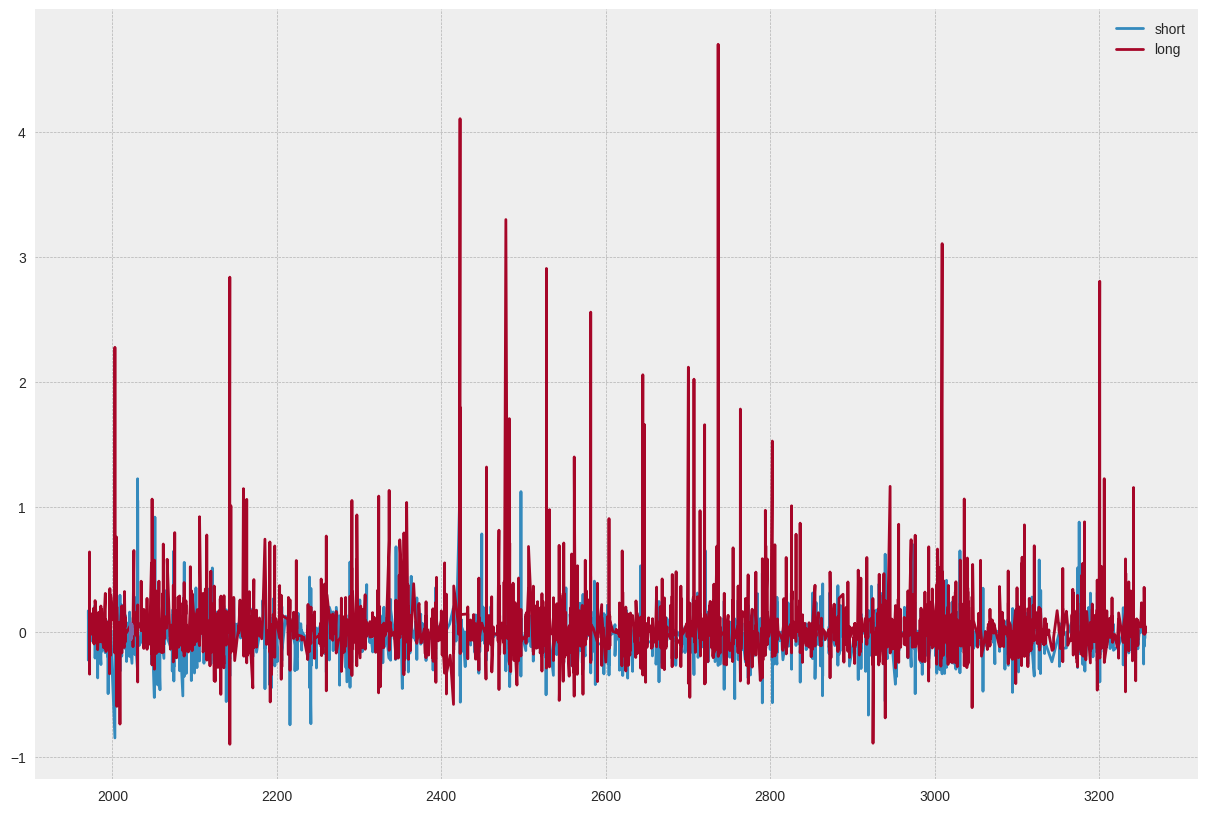

In [ ]:
import matplotlib.pyplot as plt

plt.style.use(['seaborn', 'bmh'])

fig, ax = plt.subplots()
# Create a new figure with the desired size
fig.set_size_inches(15, 10)

shorts['date'] = pd.to_datetime(shorts['date'])
longs['date'] = pd.to_datetime(longs['date'])

ax.plot(shorts['ret'])
ax.plot(longs['ret'])
ax.plot(ret_mk)

# The 'legend' function takes the labels as a list, so you need to provide them as a list
ax.legend(['short', 'long'])

plt.show()


<ipython-input-89-a7347dc71e99>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn', 'bmh'])


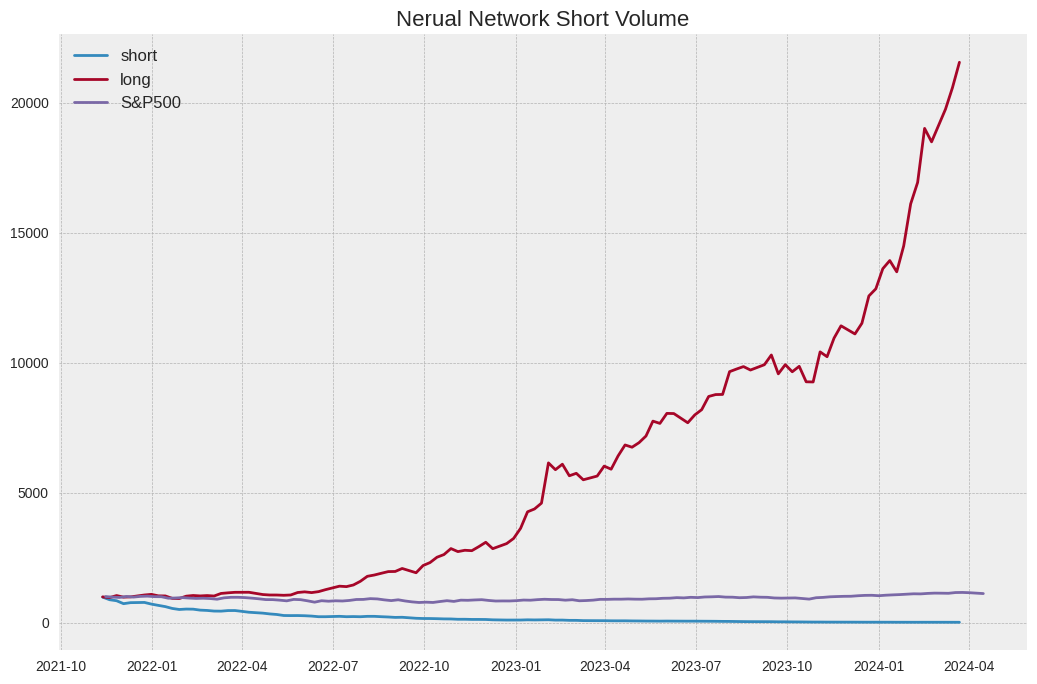

In [ ]:
import matplotlib.pyplot as plt

plt.style.use(['seaborn', 'bmh'])

fig, ax = plt.subplots()
# Create a new figure with the desired size
fig.set_size_inches(12.5, 8)

ax.plot(short_ret_1*1000)
ax.plot(long_ret_1*1000)
ax.plot(ret_mk_1*1000)


# The 'legend' function takes the labels as a list, so you need to provide them as a list
ax.legend(['short', 'long', 'S&P500'], fontsize='large')
ax.set_title('Nerual Network Short Volume', fontsize=16)


plt.show()

## Evaluate long returns

### Get weekly factors and risk-free rate

- There is some weekly data on French's website, but not everything we want is available weekly.
- So, we will get daily data and compound to weekly.

In [ ]:
from pandas_datareader import DataReader as pdr

famafrench = pdr("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start=2010)[0] / 100
famafrench.index.name = "date"
famafrench = famafrench.reset_index()
famafrench["year"] = famafrench.date.apply(lambda x: x.isocalendar()[0])
famafrench["week"] = famafrench.date.apply(lambda x: x.isocalendar()[1])

ff = None
for col in ["Mkt-RF", "SMB", "HML", "CMA", "RMW", "RF"]:
    ser = famafrench.groupby(["year", "week"], group_keys=True)[col].apply(
        lambda x: (1+x).prod() - 1
    )
    ser.name = col
    ff = pd.concat((ff, ser), axis=1)
ff["date"] = famafrench.groupby(["year", "week"], group_keys=True).date.last()
ff = ff.reset_index(drop=True)
ff = ff.set_index("date")

<ipython-input-90-629e455ed9f0>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench = pdr("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start=2010)[0] / 100


In [ ]:
mom = pdr("F-F_Momentum_Factor_daily", "famafrench", start=2010)[0]/100
mom.index.name = "date"
mom.columns = ["UMD"]
mom = mom.reset_index()
mom["year"] = mom.date.apply(lambda x: x.isocalendar()[0])
mom["week"] = mom.date.apply(lambda x: x.isocalendar()[1])

umd = mom.groupby(["year", "week"], group_keys=True).UMD.apply(
    lambda x: (1+x).prod() - 1
)
umd = pd.DataFrame(umd)
umd["date"] = mom.groupby(["year", "week"], group_keys=True).date.last()
umd = umd.reset_index(drop=True)
umd = umd.set_index("date")

<ipython-input-91-43aae452051b>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mom = pdr("F-F_Momentum_Factor_daily", "famafrench", start=2010)[0]/100


### Combine factors and long returns

In [ ]:
long_ret.name = "ret"
long_ret.index = pd.to_datetime(long_ret.index)
data = pd.concat((ff, umd, long_ret), axis=1).dropna()
data.head(3)

,Mkt-RF,SMB,HML,CMA,RMW,RF,UMD,ret
date,,,,,,,,
2021-11-12,-0.002692,-0.002733,0.008637,-0.000709,0.019964,0.0,-0.005536,-0.008931
2021-11-19,-0.001325,-0.024173,-0.016106,-0.006828,0.039268,0.0,0.010808,-0.028268
2021-11-26,-0.025541,-0.015563,0.026951,0.019272,0.012077,0.0,0.000857,0.082542


In [ ]:
short_ret.name = "ret"
short_ret.index = pd.to_datetime(short_ret.index)
data = pd.concat((ff, umd, short_ret), axis=1).dropna()
data.head(3)

,Mkt-RF,SMB,HML,CMA,RMW,RF,UMD,ret
date,,,,,,,,
2021-11-12,-0.002692,-0.002733,0.008637,-0.000709,0.019964,0.0,-0.005536,-0.017167
2021-11-19,-0.001325,-0.024173,-0.016106,-0.006828,0.039268,0.0,0.010808,-0.102217
2021-11-26,-0.025541,-0.015563,0.026951,0.019272,0.012077,0.0,0.000857,-0.043814


### Sharpe ratio

In [ ]:
import numpy as np

sharpe = np.sqrt(52) * (data.ret - data.RF).mean() / data.ret.std()
print(f"annualized Sharpe ratio is {sharpe:.2%}")

annualized Sharpe ratio is 329.72%


### Market alpha and information ratio

In [ ]:
import statsmodels.formula.api as smf

data["ret_rf"] = data.ret - data.RF
data["mkt_rf"] = data["Mkt-RF"]
result = smf.ols("ret_rf ~ mkt_rf", data).fit()

alpha = 52*result.params["Intercept"]
resid_stdev = np.sqrt(52 * result.mse_resid)
info_ratio = alpha / resid_stdev

print(f"annualized alpha is {alpha:.2%}")
print(f"annualized information ratio is {info_ratio:.2%}")

annualized alpha is 140.80%
annualized information ratio is 361.21%


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     82.61
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.87e-15
Time:                        04:22:39   Log-Likelihood:                 209.53
No. Observations:                 109   AIC:                            -415.1
Df Residuals:                     107   BIC:                            -409.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0371      0.003    -10.835      0.0

### Attribution analysis

In [ ]:
result.params["Intercept"]

-0.03708273258906349

In [ ]:
alpha = 52*result.params["Intercept"]
print(alpha)

-1.9283020946313016


In [ ]:
result = smf.ols("ret_rf ~ mkt_rf + SMB + HML + CMA + RMW + UMD", data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     30.56
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           9.54e-21
Time:                        04:22:39   Log-Likelihood:                 234.42
No. Observations:                 109   AIC:                            -454.8
Df Residuals:                     102   BIC:                            -436.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0336      0.003    -11.834      0.0

## Analyze fitted model on most recent data

### Get most recent data from backtest data

In [ ]:
present = future[future.date==future.date.max()]

### Feature Importance

In [ ]:
import numpy as np
import pandas as pd

# Get the fully connected layer weights
for name, module in neural_model_pytorch.named_modules():
    if isinstance(module, nn.Linear):
        fc_weights = module.weight.data.numpy()
        break  # Assuming you have only one fully connected layer
else:
    raise ValueError("No fully connected layer found in the model.")

# Compute feature importance from the weights
feature_importance = np.mean(np.abs(fc_weights), axis=0)

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance (if needed)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


           Feature  Importance
13          pb_vol    0.120998
5            relss    0.119750
14       relss_vol    0.119306
12         mom_vol    0.118757
11   marketcap_vol    0.118299
9     accruals_vol    0.118263
2        marketcap    0.117995
3              mom    0.116758
6              roe    0.116449
1              agr    0.115631
4               pb    0.115518
15         roe_vol    0.115364
17      volume_vol    0.114666
0         accruals    0.113737
7       volatility    0.113596
8           volume    0.113243
16  volatility_vol    0.112906
10         agr_vol    0.112597
